In [11]:
from tensorflow import keras

# 데이터 삽입
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
# 모델을 만드는 함수 정의
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28,28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [13]:
model = model_fn()
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
# history를 담아보자
# vervose=0 으로 지정해주면 훈련과정을 나타내지 않는다.
history = model.fit(train_scaled, train_target, epochs=5, verbose=1)
print(history.history.keys())
# loss와 accuracy가 포함되어 있다.

Epoch 1/5
1500/1500 [==============================] - 1s 573us/step - loss: 0.5246 - accuracy: 0.8169
Epoch 2/5
1500/1500 [==============================] - 1s 681us/step - loss: 0.3943 - accuracy: 0.8596
Epoch 3/5
1500/1500 [==============================] - 1s 489us/step - loss: 0.3515 - accuracy: 0.8730
Epoch 4/5
1500/1500 [==============================] - 1s 532us/step - loss: 0.3264 - accuracy: 0.8804
Epoch 5/5
1500/1500 [==============================] - 1s 497us/step - loss: 0.3053 - accuracy: 0.8887
dict_keys(['loss', 'accuracy'])


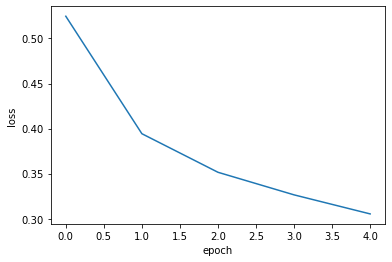

In [15]:
# loss를 그래프로 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

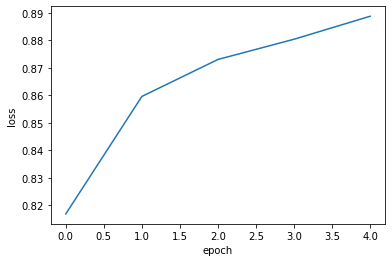

In [16]:
# accuracy를 그래프로 출력
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## epoch를 20으로 올려서 그래프를 그려보자

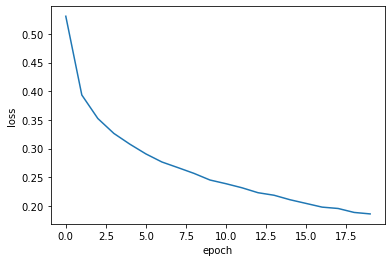

In [17]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 맞다 과대적합.
이번에는 훈련세트와 더불어서 검증세트도 함께 출력해보자

In [18]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [19]:
# history에 담긴 값은?
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


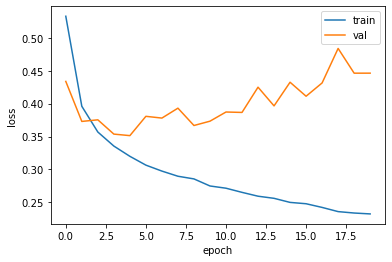

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## Adam 옵티마이저를 사용해서 다시 출력해보자

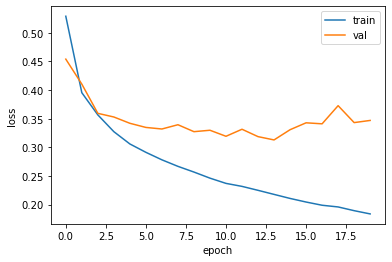

In [21]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 검증세트의 loss가 증가하지 않고 유지되는 것을 확인할 수 있다.

## 신경망의 대표적 규제방법, 드롭아웃

In [22]:
# 드롭아웃 은닉층은 랜덤하게 뉴런을 드롭아웃해서 과대적합을 막는다.
# 드롭아웃 은닉층을 추가해보자
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


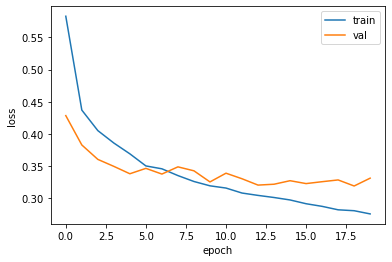

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()
# 드롭아웃을 통해 조금 더 정확한 예측이 가능해졌지만, 가장 좋은 에포크는 10이라는 것을 알 수 있다.

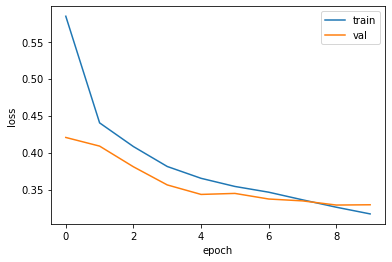

In [24]:
# 에포크를 10으로 줘서 다시 학습을 시켜보자
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 모델 저장

In [26]:
# 훈련한 모델의 파라미터를 저장하는 save_weights() 메서드
model.save_weights('model-weights.h5')

# 모델 구조와 모델 파라미터를 함께 저장하는 save() 메서드
model.save('model-whole.h5')